In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load dataset




In [3]:
X_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets/Training/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Training/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 2)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append(3)




# Prepare and load data Test

In [4]:
X_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets/Testing/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Testing/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 2)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 3)



In [5]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D


# Building the network

In [7]:
model = Sequential()
model.add(Conv2D(64, 3, input_shape=(130,130,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, 3,activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 256)      0

# Split data into Train and Validation

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# train the network

In [10]:
history = model.fit( X_train, y_train, epochs = 50 ,  verbose=1 , validation_data=(X_valid , y_valid) )

Epoch 1/50
77/77 [==============================] - 16s 93ms/step - loss: 1.1582 - accuracy: 0.5289 - val_loss: 0.8659 - val_accuracy: 0.5963
Epoch 2/50
77/77 [==============================] - 6s 84ms/step - loss: 0.7070 - accuracy: 0.6991 - val_loss: 0.6932 - val_accuracy: 0.6659
Epoch 3/50
77/77 [==============================] - 7s 85ms/step - loss: 0.5368 - accuracy: 0.7864 - val_loss: 0.5174 - val_accuracy: 0.7773
Epoch 4/50
77/77 [==============================] - 6s 84ms/step - loss: 0.4427 - accuracy: 0.8130 - val_loss: 0.3661 - val_accuracy: 0.8631
Epoch 5/50
77/77 [==============================] - 7s 85ms/step - loss: 0.3605 - accuracy: 0.8549 - val_loss: 0.4924 - val_accuracy: 0.7773
Epoch 6/50
77/77 [==============================] - 7s 85ms/step - loss: 0.3239 - accuracy: 0.8733 - val_loss: 0.2939 - val_accuracy: 0.8956
Epoch 7/50
77/77 [==============================] - 6s 84ms/step - loss: 0.2741 - accuracy: 0.8930 - val_loss: 0.3211 - val_accuracy: 0.8654
Epoch 8/50
7

# plot the loss and accuracy of the model over the training and validation data during training

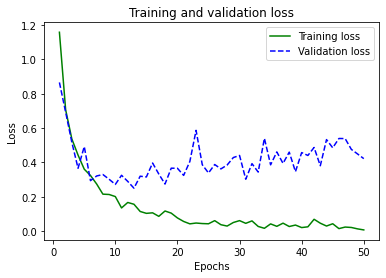

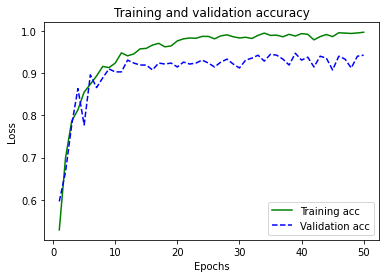

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', linestyle='dashed', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', linestyle='dashed', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()


# train & test loss and accuracy

In [12]:
score = model.evaluate(X_train , y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy: ', score[1]*100.0 ,'%')

Train loss: 8.271453407360241e-05
Train accuracy:  100.0 %


In [13]:
score = model.evaluate(X_test , y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0 ,'%')

Test loss: 4.268820285797119
Test accuracy:  74.11167621612549 %
